In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)
import datetime
from os import listdir, walk
from os.path import isfile, join
import xlsxwriter
from bokeh.plotting import figure, show

In [4]:
# enter file path for longtem site here
# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-D_Longterm_L1/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-C_Longterm_L2/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-B_Longterm_L3/'
# daystopull = ['2023-02-22','2023-02-23'] ## L1, 2, 3 days

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-C_Longterm_L4 Redo/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-D_Longterm_L5 Redo/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-B_Longterm_L6 Redo/'
# daystopull = ['2023-03-15','2023-03-16'] ## L4, 5, 6 days

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-D_Longterm_L7/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-C_Longterm_L8/'

raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-B_Longterm_L9/'
daystopull = ['2023-03-21','2023-03-22'] ## L7, 8, 9 days

#enter dates to pull for individual date plotting for the specific datafile submitted

# daystopull = ['2023-02-22','2023-02-23'] ## L1, 2, 3 days
# daystopull = ['2023-02-28','2023-03-01'] ## L4, 5, 6 days
# daystopull = ['2023-03-21','2023-03-22'] ## L7, 8, 9 days

path_datafiles = [f for f in listdir(raw_data_path) if isfile(join(raw_data_path,f))]
#only read excel files, filter for .xlsx
path_datafiles = [k for k in path_datafiles if '.xlsx' in k]
print(path_datafiles)

['831_0001435-20230320 171415-23032000.LD0.xlsx', '831_0001435-20230321 000000-23032100.LD0.xlsx', '831_0001435-20230322 000000-23032200.LD0.xlsx', '831_0001435-20230323 000000-23032300.LD0.xlsx']


C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_3884\2700289321.py:46: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  longterm.columns = longterm.columns.str.replace(".","")
C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_3884\2700289321.py:53: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dayone = longterm.get(archive_date[0])
C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_3884\2700289321.py:55: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  daytwo =longterm.get(archive_date[1])
C:\Users\jPfitsch\AppDa

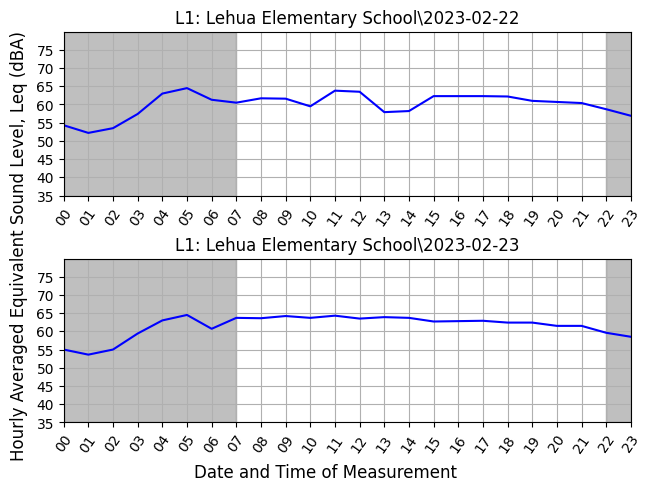

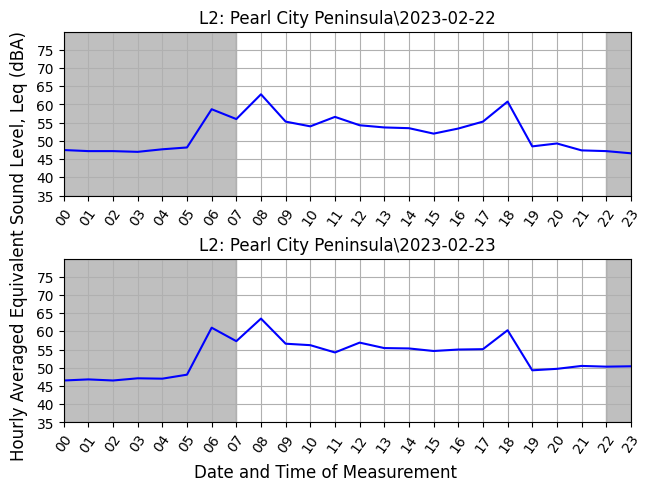

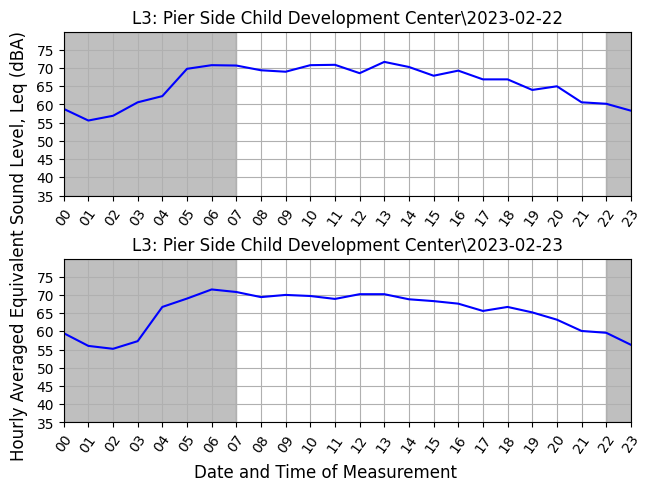

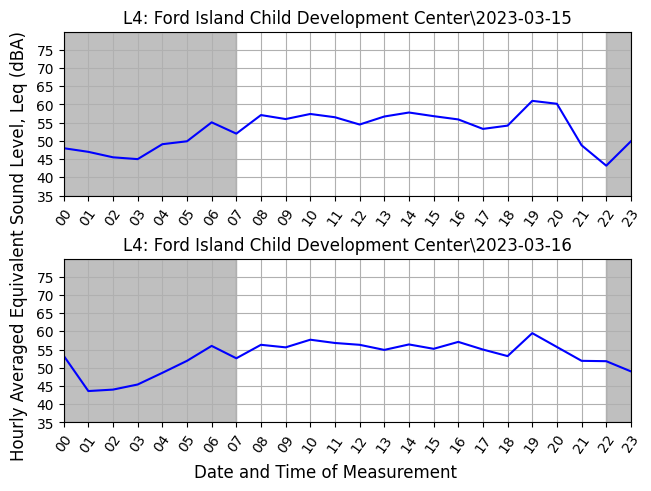

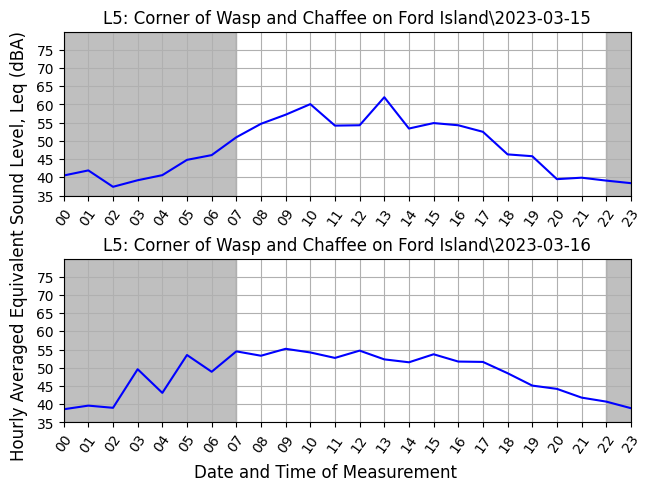

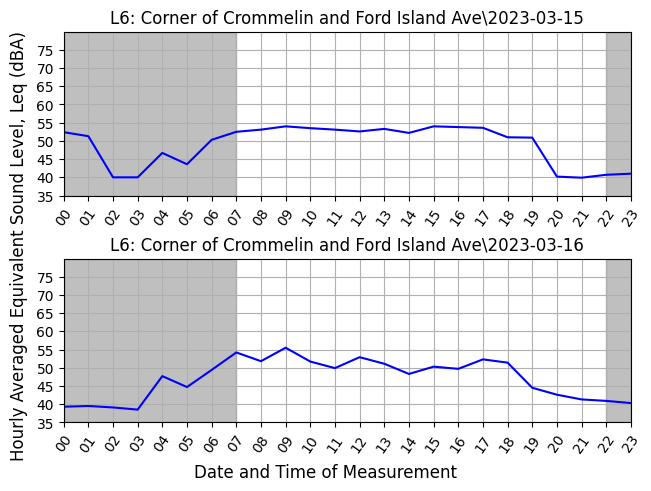

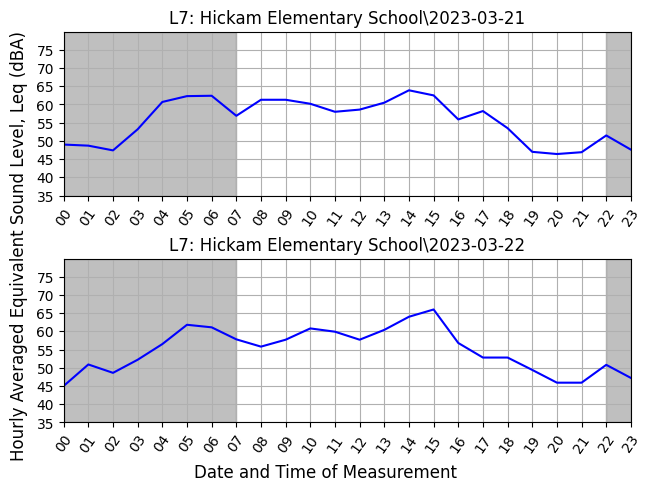

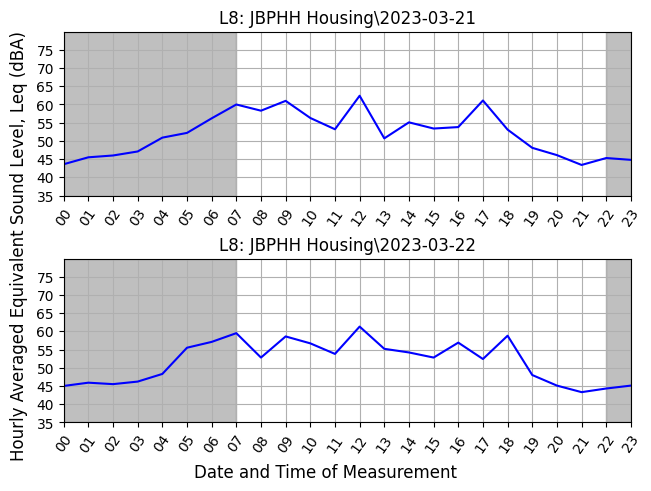

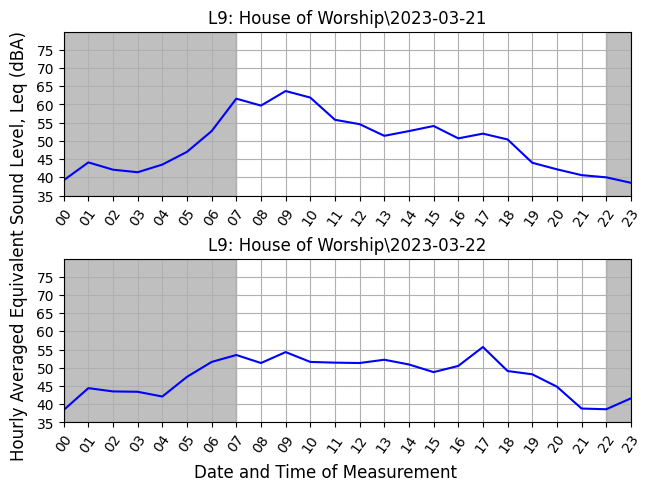

In [127]:
# plotting all the L sites 

allrawpath = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/'
site_list = ['L1: Lehua Elementary School',
             'L2: Pearl City Peninsula',
             'L3: Pier Side Child Development Center',
             'L4: Ford Island Child Development Center',
             'L5: Corner of Wasp and Chaffee on Ford Island',
             'L6: Corner of Crommelin and Ford Island Ave',
             'L7: Hickam Elementary School',
             'L8: JBPHH Housing',
             'L9: House of Worship']
slm_list = ['SLM-D_Longterm_L1/',
            'SLM-C_Longterm_L2/',
            'SLM-B_Longterm_L3/',
            'SLM-C_Longterm_L4 Redo/',
            'SLM-D_Longterm_L5 Redo/',
            'SLM-B_Longterm_L6 Redo/',
            'SLM-D_Longterm_L7/',
            'SLM-C_Longterm_L8/',
            'SLM-B_Longterm_L9/']
alldays = [['2023-02-22','2023-02-23'],
           ['2023-02-22','2023-02-23'],
           ['2023-02-22','2023-02-23'],
           ['2023-03-15','2023-03-16'],
           ['2023-03-15','2023-03-16'],
           ['2023-03-15','2023-03-16'],
           ['2023-03-21','2023-03-22'],
           ['2023-03-21','2023-03-22'],
           ['2023-03-21','2023-03-22']]

# join(allrawpath,slm_list[1])
for j in range(len(slm_list)):
    curr_archive = join(allrawpath,slm_list[j])
    archive_date = alldays[j]
    path_datafiles = [f for f in listdir(curr_archive) if isfile(join(curr_archive,f))]
    #only read excel files, filter for .xlsx
    path_datafiles = [k for k in path_datafiles if '.xlsx' in k]
    # read all xcel files into single dataframe
    datasheet = 'Measurement History'
    longterm = pd.DataFrame()
    for i in range(len(path_datafiles)):
        curr_longterm = pd.read_excel(curr_archive+path_datafiles[i],datasheet)
        longterm = pd.concat([longterm, curr_longterm])
    #remove periods from columns 
    longterm.columns = longterm.columns.str.replace(".","")
    longterm.columns = longterm.columns.str.replace("#","")
    longterm = longterm.set_index('Date')

    #####-=-=-=-=-plotting Line graphs ONLY -=-=--=-=#######
    # for days in archive_date:
    # currday = longterm.get(days)
    dayone = longterm.get(archive_date[0])
    dateone = archive_date[0] # string for date display
    daytwo =longterm.get(archive_date[1])
    datetwo = archive_date[1]
    # can we figure out how to loop through these? 

    # figure definitions - each figure has two plots, share the y scale 
    fig, [ax1, ax2] = plot.subplots(2,1, sharey=True, layout='constrained')
    fig.supxlabel("Date and Time of Measurement")
    fig.supylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")

    # plot.plot(dayone.Time,dayone.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
    ax1.plot(dayone.Time,dayone.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
    # plot.plot(dayone.Time,dayone.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
    # plot.plot(dayone.Time,dayone.LAS9000,color = 'green', linestyle = '--', label = 'LAS90')
    
    ax1.set_ylim(35, 80)
    ax1.set_yticks(np.arange(35,80,5))
    ax1.xaxis.set_major_locator(HourLocator(byhour=range(0,24,1)))
    ax1.xaxis.set_major_formatter(DateFormatter('%H'))
    ax1.margins(x=0)
    # ax1.set_xlim('00:00:00.000','23:00:00.000')
    # set x axis span just 24h, no previous
    ax1.grid(True)
    
    ax1.set_title(join(site_list[j],dateone)) 

    ax1.axvspan(dateone+' 00:00:00.000',dateone+' 07:00:00.000',
                color = 'grey', alpha = 0.5)
    ax1.axvspan(dateone+' 22:00:00.000',dateone+' 23:00:00.000',
                color = 'grey', alpha = 0.5)
    ax1.tick_params(axis='x', rotation = 55)
    
    #####-=--=-=-=- 2nd plot -=-=-=-==-######
    
    ax2.plot(daytwo.Time,daytwo.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
    # plot.plot(dayone.Time,dayone.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
    # plot.plot(dayone.Time,dayone.LAS9000,color = 'green', linestyle = '--', label = 'LAS90')
 
    ax2.xaxis.set_major_locator(HourLocator(byhour=range(0,24,1)))
    ax2.xaxis.set_major_formatter(DateFormatter('%H'))
    ax2.margins(x=0)
    # ax2.set_xlim(datetwo+'00:00:00.000',datetwo+'23:00:00.000')
    ax2.grid(True)
    ax2.set_title(join(site_list[j],datetwo)) 

    ax2.axvspan(datetwo+' 00:00:00.000',datetwo+' 07:00:00.000',
                color = 'grey', alpha = 0.5)
    ax2.axvspan(datetwo+' 22:00:00.000',datetwo+' 23:00:00.000',
                color = 'grey', alpha = 0.5)
    ax2.tick_params(axis='x', rotation = 55)




    

In [89]:
# read all xcel files into single dataframe
datasheet = 'Measurement History'
longterm = pd.DataFrame()
for i in range(len(path_datafiles)):
    curr_longterm = pd.read_excel(raw_data_path+path_datafiles[i],datasheet)
    longterm = pd.concat([longterm, curr_longterm])
#remove periods from columns 
longterm.columns = longterm.columns.str.replace(".","")
longterm.columns = longterm.columns.str.replace("#","")
longterm = longterm.set_index('Date')

C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_23308\2817628680.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  longterm.columns = longterm.columns.str.replace(".","")


In [ ]:
#plotting the entire span of data: 

plot.plot(longterm.index,longterm.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
plot.plot(longterm.index,longterm.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
plot.plot(longterm.index,longterm.LAS9000,color = 'green', linestyle = '--', label = 'LAS90.00')
plot.ylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")
plot.xlabel("Date and Time of Measurement")
plot.grid(True)
plot.legend()

#color the night time grey
# need to figure out how to programmaticlly datermine the dates here
# plot.axvspan()
# plot.axvspan('2023-02-28 07:00:00.000','2023-02-28 22:00:00.000',
#                  color = 'grey', alpha = 0.5)
# plot.axvspan(longterm.index, ,
#                  color = 'grey', alpha = 0.5)

C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_3884\2130618464.py:45: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  longterm.columns = longterm.columns.str.replace(".","")
C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_3884\2130618464.py:52: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dayone = longterm.get(archive_date[0])
C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_3884\2130618464.py:54: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  daytwo =longterm.get(archive_date[1])
C:\Users\jPfitsch\AppDa

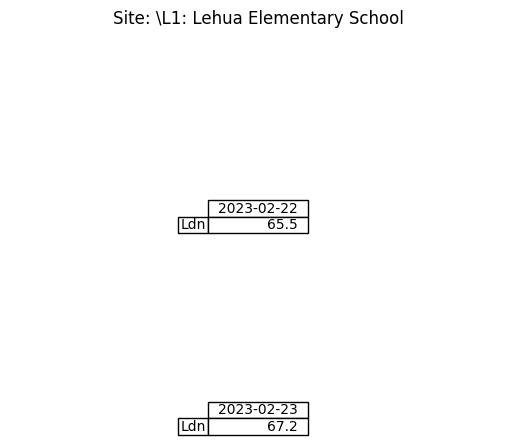

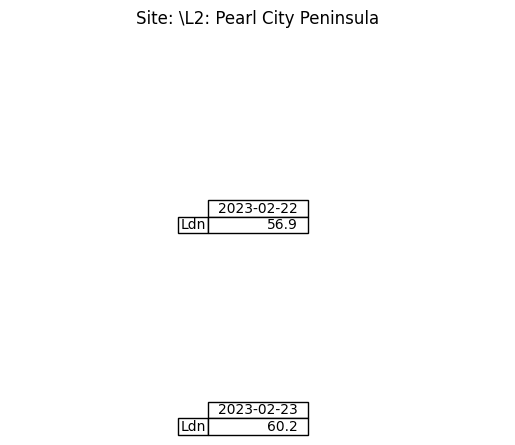

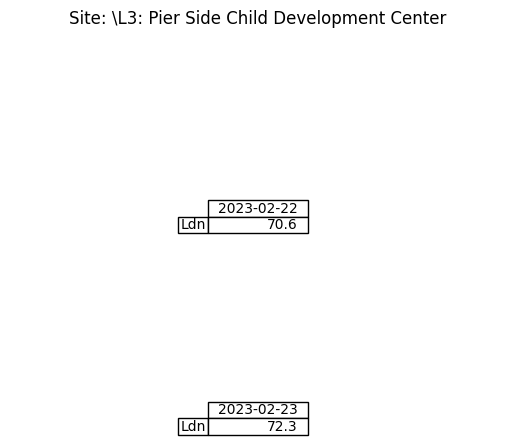

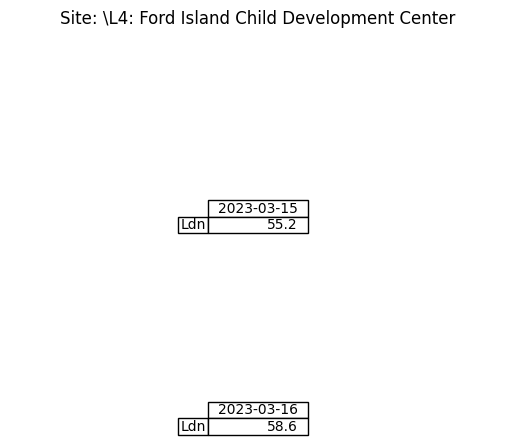

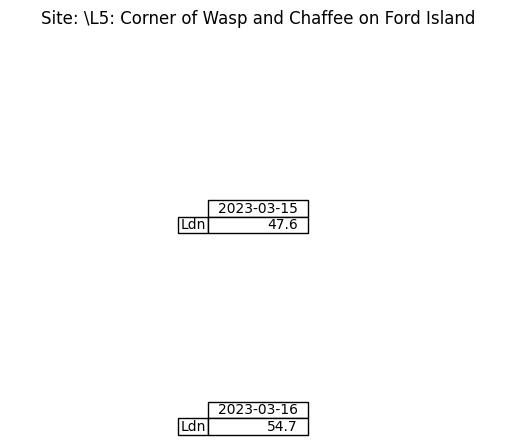

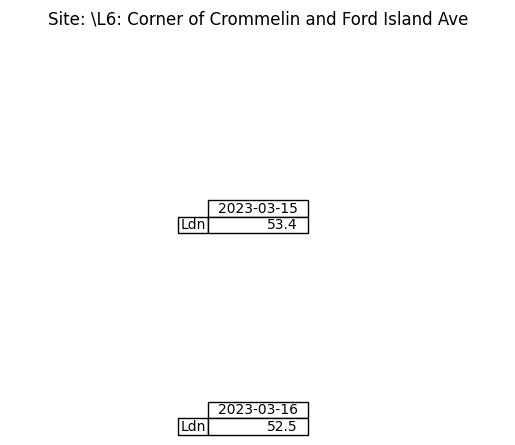

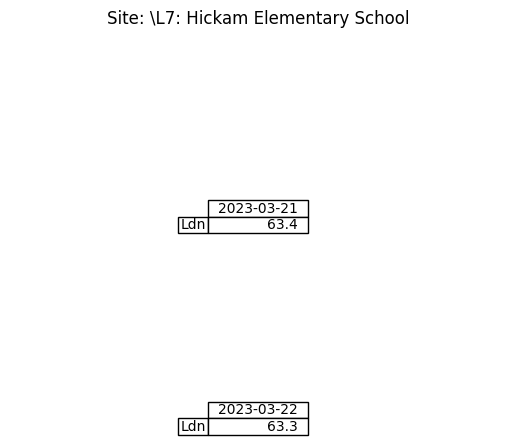

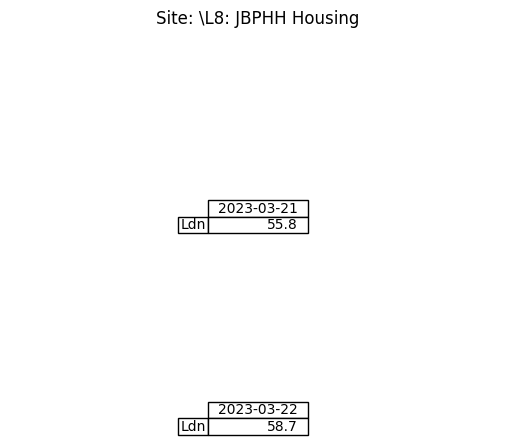

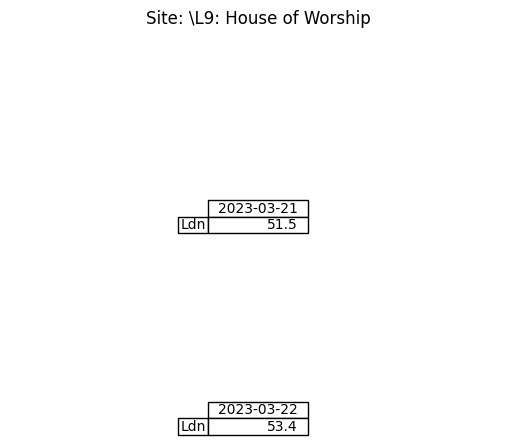

In [129]:
### JUST TABLE PLOTTING ###

allrawpath = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/'
site_list = ['L1: Lehua Elementary School',
             'L2: Pearl City Peninsula',
             'L3: Pier Side Child Development Center',
             'L4: Ford Island Child Development Center',
             'L5: Corner of Wasp and Chaffee on Ford Island',
             'L6: Corner of Crommelin and Ford Island Ave',
             'L7: Hickam Elementary School',
             'L8: JBPHH Housing',
             'L9: House of Worship']
slm_list = ['SLM-D_Longterm_L1/',
            'SLM-C_Longterm_L2/',
            'SLM-B_Longterm_L3/',
            'SLM-C_Longterm_L4 Redo/',
            'SLM-D_Longterm_L5 Redo/',
            'SLM-B_Longterm_L6 Redo/',
            'SLM-D_Longterm_L7/',
            'SLM-C_Longterm_L8/',
            'SLM-B_Longterm_L9/']
alldays = [['2023-02-22','2023-02-23'],
           ['2023-02-22','2023-02-23'],
           ['2023-02-22','2023-02-23'],
           ['2023-03-15','2023-03-16'],
           ['2023-03-15','2023-03-16'],
           ['2023-03-15','2023-03-16'],
           ['2023-03-21','2023-03-22'],
           ['2023-03-21','2023-03-22'],
           ['2023-03-21','2023-03-22']]

for j in range(len(slm_list)):
    curr_archive = join(allrawpath,slm_list[j])
    archive_date = alldays[j]
    path_datafiles = [f for f in listdir(curr_archive) if isfile(join(curr_archive,f))]
    #only read excel files, filter for .xlsx
    path_datafiles = [k for k in path_datafiles if '.xlsx' in k]
    # read all xcel files into single dataframe
    datasheet = 'Measurement History'
    longterm = pd.DataFrame()
    for i in range(len(path_datafiles)):
        curr_longterm = pd.read_excel(curr_archive+path_datafiles[i],datasheet)
        longterm = pd.concat([longterm, curr_longterm])
    #remove periods from columns 
    longterm.columns = longterm.columns.str.replace(".","")
    longterm.columns = longterm.columns.str.replace("#","")
    longterm = longterm.set_index('Date')

    #####-=-=-=-=- statistics-=-=--=-=#######
    # for days in archive_date:
    # currday = longterm.get(days)
    dayone = longterm.get(archive_date[0])
    dateone = archive_date[0] # string for date display
    daytwo =longterm.get(archive_date[1])
    datetwo = archive_date[1]
    # can we figure out how to loop through these? 

    fig, [ax1, ax2] = plot.subplots(2,1)
    plot.rcParams
    ax1.set_axis_off()
    ax2.set_axis_off()
    title_one = join('Site: ',site_list[j])
    # plot.title(join(site_list[j],dateone))

    ax1.set_title(title_one)
    daytime = dayone.between_time('07:00:00.000','21:00:00.000')
    nighttime = pd.concat([dayone.between_time('00:00:00.000','06:00:00.000'),dayone.between_time('22:00:00.000','23:00:00.000')])
    # daytime_mean = np.mean(daytime.LAeq)
    daytime_logmean = 10*(np.log10((np.sum(10**(0.1*daytime.LAeq))))/np.count_nonzero(daytime.LAeq))
    nighttime_logmean = 10*(np.log10((np.sum(10**(0.1*nighttime.LAeq)))/np.count_nonzero(nighttime.LAeq)))
    # night_mean = np.mean(nighttime.LAeq)
    Level_dn = 10*(np.log10((15*(10**(daytime_logmean/10))+9*(10**((nighttime_logmean+10)/10)))/24))
    row_labels = ['Ldn']
    col_labels = [dateone]
    tabledata = [
                [np.round(Level_dn,1)]]
    
    table = ax1.table(cellText=tabledata,
                colWidths=[0.2]*3,
                rowLabels=row_labels,
                colLabels=col_labels
                )
    
    # plot.title(join(site_list[j],datetwo))
    daytime = daytwo.between_time('07:00:00.000','21:00:00.000')
    nighttime = pd.concat([daytwo.between_time('00:00:00.000','06:00:00.000'),daytwo.between_time('22:00:00.000','23:00:00.000')])
    daytime_logmean = 10*(np.log10((np.sum(10**(0.1*daytime.LAeq)))/np.count_nonzero(daytime.LAeq)))
    nighttime_logmean = 10*(np.log10((np.sum(10**(0.1*nighttime.LAeq)))/np.count_nonzero(nighttime.LAeq)))
    # daytime_mean = np.mean(daytwo.LAeq)
    # night_mean = np.mean(nighttime.LAeq)
    Level_dn = 10*(np.log10((15*(10**(daytime_logmean/10))+9*(10**((nighttime_logmean+10)/10)))/24))

    row_labels = ['Ldn']
    col_labels = [datetwo]
    #    tabledata = [[min(daytwo.LAeq)],
    #             [max(daytwo.LAeq)],
    #             [np.round(daytime_logmean,1)],
    #             [np.round(nighttime_logmean,1)],
    #             [np.round(Level_dn,1)]]
    tabledata = [
                [np.round(Level_dn,1)]]
    
    title_two = join('Site: ',site_list[j])

    table = ax2.table(cellText=tabledata,
                colWidths=[0.2]*3,
                rowLabels=row_labels,
                colLabels=col_labels,
                # loc='lower right'
                )
    # fig.tight_layout()

In [109]:
daytime_logmean = 10*(np.log10((np.sum(10**(0.1*daytime.LAeq)))/np.count_nonzero(daytime.LAeq)))
print(daytime_logmean)

51.417880178878065
